the data was extract manually from the link https://sullygnome.com/channels/30/peakviewers

Highest viewer Twitch streamers, past 30 days - SullyGnome. Top 1000

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import statistics as stat
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn import preprocessing
from scipy.spatial import transform
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler 
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# List of Excel file names
file_names = ['Highest viewer Twitch streamers, past 30 days - SullyGnome.xlsx',
              'Highest viewer Twitch streamers, past 30 days - SullyGnome (1).xlsx',
              'Highest viewer Twitch streamers, past 30 days - SullyGnome (2).xlsx',
              'Highest viewer Twitch streamers, past 30 days - SullyGnome (3).xlsx',
              'Highest viewer Twitch streamers, past 30 days - SullyGnome (4).xlsx',
              'Highest viewer Twitch streamers, past 30 days - SullyGnome (5).xlsx',
              'Highest viewer Twitch streamers, past 30 days - SullyGnome (6).xlsx',
              'Highest viewer Twitch streamers, past 30 days - SullyGnome (7).xlsx',
              'Highest viewer Twitch streamers, past 30 days - SullyGnome (8).xlsx',
              'Highest viewer Twitch streamers, past 30 days - SullyGnome (9).xlsx']

# Read the column names from the reference file
ref_file = "Highest viewer Twitch streamers, past 30 days - SullyGnome.xlsx"
ref_df = pd.read_excel(ref_file, header=0)
col_names = ref_df.columns

# Initialize an empty dataframe with the correct column names
df = pd.DataFrame(columns=col_names)

# Loop over the file names and read the data from each file, skipping the header row
for file in file_names:
    data = pd.read_excel(file, header=0, skiprows=[0])
    df = pd.concat([df, data], axis=0, ignore_index=True)

# Save the combined data to a new Excel file
df = df.drop(df.columns[:12], axis=1)

In [2]:

# list of 2 values to replace the first 2 column names
new_col_names = ['borrar', 'ranking_popularity']

# change the first 2 column names
df.rename(columns={df.columns[0]: new_col_names[0], df.columns[1]: new_col_names[1]}, inplace=True)


In [3]:
df.drop('borrar', axis=1, inplace=True)
df

,ranking_popularity,Channel,Watch time (mins),Stream time (mins),Peak viewers,Average viewers,Followers,Followers gained,Partnered,Mature,Language
0,1.0,TheGrefg,625107360.0,5280.0,1745462.0,118391.0,11092064.0,558757.0,True,False,Spanish
1,2.0,kingsleague,500071575.0,2115.0,792033.0,236440.0,1858868.0,580828.0,True,False,Spanish
2,3.0,ibai,391200285.0,5655.0,289137.0,69177.0,12520523.0,259482.0,True,False,Spanish
3,4.0,PaulinhoLOKObr,595767150.0,6060.0,266793.0,98311.0,1975600.0,274200.0,True,False,Portuguese
4,5.0,ElSpreen,513756015.0,5025.0,217043.0,102240.0,6762095.0,527453.0,True,False,Spanish
...,...,...,...,...,...,...,...,...,...,...,...
995,996.0,MitchJones,10713090.0,2835.0,7768.0,3778.0,624070.0,591.0,False,False,English
996,997.0,pmleek,574245.0,2415.0,7768.0,237.0,38999.0,385.0,True,False,French
997,998.0,PINQTOST,1368945.0,375.0,7745.0,3650.0,160369.0,10798.0,False,False,Russian
998,999.0,이춘향 (leechunhyang),28596975.0,11895.0,7739.0,2404.0,257847.0,4061.0,True,False,Korean


In [4]:
df['Channel'] = df['Channel'].str.upper()
df



,ranking_popularity,Channel,Watch time (mins),Stream time (mins),Peak viewers,Average viewers,Followers,Followers gained,Partnered,Mature,Language
0,1.0,THEGREFG,625107360.0,5280.0,1745462.0,118391.0,11092064.0,558757.0,True,False,Spanish
1,2.0,KINGSLEAGUE,500071575.0,2115.0,792033.0,236440.0,1858868.0,580828.0,True,False,Spanish
2,3.0,IBAI,391200285.0,5655.0,289137.0,69177.0,12520523.0,259482.0,True,False,Spanish
3,4.0,PAULINHOLOKOBR,595767150.0,6060.0,266793.0,98311.0,1975600.0,274200.0,True,False,Portuguese
4,5.0,ELSPREEN,513756015.0,5025.0,217043.0,102240.0,6762095.0,527453.0,True,False,Spanish
...,...,...,...,...,...,...,...,...,...,...,...
995,996.0,MITCHJONES,10713090.0,2835.0,7768.0,3778.0,624070.0,591.0,False,False,English
996,997.0,PMLEEK,574245.0,2415.0,7768.0,237.0,38999.0,385.0,True,False,French
997,998.0,PINQTOST,1368945.0,375.0,7745.0,3650.0,160369.0,10798.0,False,False,Russian
998,999.0,이춘향 (LEECHUNHYANG),28596975.0,11895.0,7739.0,2404.0,257847.0,4061.0,True,False,Korean


In [5]:
# obtenemos con un filtro dentro de uuna conulta de la web twitcchtrackker 
# una tabla con los epsorts oficiales dentro de twithc
viewership_data = pd.read_csv("viewership_data.csv")

df = pd.merge(df, viewership_data, left_on="Channel", right_on="channel", how="left")
df

,ranking_popularity,Channel,Watch time (mins),Stream time (mins),Peak viewers,Average viewers,Followers,Followers gained,Partnered,Mature,...,channel,AVG VIEWERS,TIME STREAMED (hours),ALL TIME PEAK VIEWERS,HOURS WATCHED,RANK,FOLLOWERS GAINED,TOTAL FOLLOWERS,TOTAL VIEWS,Esport_channel
0,1.0,THEGREFG,625107360.0,5280.0,1745462.0,118391.0,11092064.0,558757.0,True,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,KINGSLEAGUE,500071575.0,2115.0,792033.0,236440.0,1858868.0,580828.0,True,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,IBAI,391200285.0,5655.0,289137.0,69177.0,12520523.0,259482.0,True,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,PAULINHOLOKOBR,595767150.0,6060.0,266793.0,98311.0,1975600.0,274200.0,True,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,ELSPREEN,513756015.0,5025.0,217043.0,102240.0,6762095.0,527453.0,True,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996.0,MITCHJONES,10713090.0,2835.0,7768.0,3778.0,624070.0,591.0,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
996,997.0,PMLEEK,574245.0,2415.0,7768.0,237.0,38999.0,385.0,True,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
997,998.0,PINQTOST,1368945.0,375.0,7745.0,3650.0,160369.0,10798.0,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
998,999.0,이춘향 (LEECHUNHYANG),28596975.0,11895.0,7739.0,2404.0,257847.0,4061.0,True,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df =df.drop(df.columns[11:20], axis=1)


In [7]:
df

,ranking_popularity,Channel,Watch time (mins),Stream time (mins),Peak viewers,Average viewers,Followers,Followers gained,Partnered,Mature,Language,Esport_channel
0,1.0,THEGREFG,625107360.0,5280.0,1745462.0,118391.0,11092064.0,558757.0,True,False,Spanish,NaN
1,2.0,KINGSLEAGUE,500071575.0,2115.0,792033.0,236440.0,1858868.0,580828.0,True,False,Spanish,NaN
2,3.0,IBAI,391200285.0,5655.0,289137.0,69177.0,12520523.0,259482.0,True,False,Spanish,NaN
3,4.0,PAULINHOLOKOBR,595767150.0,6060.0,266793.0,98311.0,1975600.0,274200.0,True,False,Portuguese,NaN
4,5.0,ELSPREEN,513756015.0,5025.0,217043.0,102240.0,6762095.0,527453.0,True,False,Spanish,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
995,996.0,MITCHJONES,10713090.0,2835.0,7768.0,3778.0,624070.0,591.0,False,False,English,NaN
996,997.0,PMLEEK,574245.0,2415.0,7768.0,237.0,38999.0,385.0,True,False,French,NaN
997,998.0,PINQTOST,1368945.0,375.0,7745.0,3650.0,160369.0,10798.0,False,False,Russian,NaN
998,999.0,이춘향 (LEECHUNHYANG),28596975.0,11895.0,7739.0,2404.0,257847.0,4061.0,True,False,Korean,NaN


In [8]:
df.to_csv('df_basic_views.csv', index=False)

In [58]:
#Web scrapiing con selenium webdriver

###Tarda 3 horas en correr, actualiza la base de las ganancias de los canales

import time
import pandas as pd
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

# List of values to loop through
values = pd.read_csv("combined_files.csv", usecols=[1]).values.tolist()
#values = pd.read_csv("combined_files.csv",skiprows=range(1, 562), usecols=[1]).values.tolist()
print(values)
# Create an empty dataframe to store the results

results = pd.DataFrame(columns=["input_text", "number"])

for input_text in values:
    driver = webdriver.Chrome()

    # Navigate to the website
    driver.get("https://influencermarketinghub.com/twitch-money-calculator/#toc-0")

    # Locate the input field using the xpath
    input_field = WebDriverWait(driver, 10).until(EC.element_to_be_clickable((By.XPATH, "//*[@id='channel']/input")))

    # Enter the text into the input field
    input_field.send_keys(input_text)

    # Locate the button using the image source attribute
    button = WebDriverWait(driver, 10).until(
        EC.element_to_be_clickable((By.XPATH, "//*[@id='channel']/button"))
    )

    # Click the button
    button.click()

    # Wait for the results to be displayed
    time.sleep(10)  
    

    # Locate the element with the desired number
    number_element = driver.find_element(By.CSS_SELECTOR, ".result-dollar.resAverage")

    # Extract the number from the element text
    number = number_element.text

    # Clean up the number (remove "$" and ",")
    number = float(number.strip("$").replace(",", ""))

    # Append the input_text and number to the results dataframe
    results = results.append({"input_text": input_text, "number": number}, ignore_index=True)

    # Close the browser
    driver.quit()

# Save the results dataframe to a CSV file

#results.to_csv("results.csv", index=False)

[['THEGREFG'], ['KINGSLEAGUE'], ['IBAI'], ['PAULINHOLOKOBR'], ['ELSPREEN'], ['LOUD_CORINGA'], ['SHADOUNE666'], ['AURONPLAY'], ['LEC'], ['KAICENAT'], ['CALL OF DUTY (CALLOFDUTY)'], ['BLASTPREMIER'], ['AMINEMATUE'], ['ESL_CSGO'], ['JAHREIN'], ['SCUMP'], ['CASIMITO'], ['XQC'], ['EVELONE192'], ['LCK'], ['AVALANCHESOFTWARE'], ['PLAYAPEX'], ['BIYIN_'], ['CSGO_MC'], ['JUANSGUARNIZO'], ['ELRAENN'], ['ADINROSS'], ['TARIK'], ['NIX'], ['LCS'], ['ILLOJUAN'], ['ELIASN97'], ['HJUNE'], ['ELMARIANA'], ['OTPLOL_'], ['GAMESDONEQUICK'], ['ESL_CSGOB'], ['QUACKITYTOO'], ['RUBIUS'], ['RIVERS_GG'], ['HYPE'], ['HASANABI'], ['GAULES'], ['CBLOL'], ['AMAR'], ['RAINBOW6'], ['BTSSMASH'], ['WTCN'], ['BETHESDA'], ['Y4SPLZ'], ['ROCKETLEAGUE'], ['PGL_DOTA2'], ['加藤純一です (KATO_JUNICHI0817)'], ['KENDINEMUZISYEN'], ['KAMET0'], ['NINTENDO'], ['RELOG_RU'], ['REBEUDETER'], ['TRYMACS'], ['TENDERLYBAE'], ['BAIANO'], ['WARFRAME'], ['REBORN_LIVE'], ['HLTVORG'], ['SONYSANDIEGOSTUDIO'], ['SODAPOPPIN'], ['WHOPLOHOYPAREN'], ['ROBLEIS

NoSuchWindowException: Message: no such window: target window already closed
from unknown error: web view not found
  (Session info: chrome=110.0.5481.78)
Stacktrace:
Backtrace:
	(No symbol) [0x00E86643]
	(No symbol) [0x00E1BE21]
	(No symbol) [0x00D1DA9D]
	(No symbol) [0x00CFEF6A]
	(No symbol) [0x00D73AAB]
	(No symbol) [0x00D861B6]
	(No symbol) [0x00D6FB76]
	(No symbol) [0x00D449C1]
	(No symbol) [0x00D45E5D]
	GetHandleVerifier [0x010FA142+2497106]
	GetHandleVerifier [0x011285D3+2686691]
	GetHandleVerifier [0x0112BB9C+2700460]
	GetHandleVerifier [0x00F33B10+635936]
	(No symbol) [0x00E24A1F]
	(No symbol) [0x00E2A418]
	(No symbol) [0x00E2A505]
	(No symbol) [0x00E3508B]
	BaseThreadInitThunk [0x75AC6BD9+25]
	RtlGetFullPathName_UEx [0x76FC8FD2+1218]
	RtlGetFullPathName_UEx [0x76FC8F9D+1165]


In [10]:
# llamar la tabla con las gananicas de los stremears 
results = pd.read_csv("results.csv")
#Limpieza a la tabla result
 
for i in range(len(results)):
    results.loc[i, 'input_text'] = results.loc[i, 'input_text'][2:-2]

results

,input_text,number
0,THEGREFG,22833.0
1,KINGSLEAGUE,22941.0
2,IBAI,14954.0
3,PAULINHOLOKOBR,13417.0
4,ELSPREEN,20148.0
...,...,...
995,MITCHJONES,842.0
996,PMLEEK,30.0
997,PINQTOST,177.0
998,이춘향 (LEECHUNHYANG),0.0


In [11]:
# left join the dataframe named "df" and the table in the csv named "results.csv" by rigth = input_text
#and left = Channel 

 #para cnseguir este archivo se corre el script conseguir_data

# Perform the left join on the "input_text" and "Channel" columns
df = pd.merge(df, results, left_on="Channel", right_on="input_text", how="left")
df

,ranking_popularity,Channel,Watch time (mins),Stream time (mins),Peak viewers,Average viewers,Followers,Followers gained,Partnered,Mature,Language,Esport_channel,input_text,number
0,1.0,THEGREFG,625107360.0,5280.0,1745462.0,118391.0,11092064.0,558757.0,True,False,Spanish,NaN,THEGREFG,22833.0
1,2.0,KINGSLEAGUE,500071575.0,2115.0,792033.0,236440.0,1858868.0,580828.0,True,False,Spanish,NaN,KINGSLEAGUE,22941.0
2,3.0,IBAI,391200285.0,5655.0,289137.0,69177.0,12520523.0,259482.0,True,False,Spanish,NaN,IBAI,14954.0
3,4.0,PAULINHOLOKOBR,595767150.0,6060.0,266793.0,98311.0,1975600.0,274200.0,True,False,Portuguese,NaN,PAULINHOLOKOBR,13417.0
4,5.0,ELSPREEN,513756015.0,5025.0,217043.0,102240.0,6762095.0,527453.0,True,False,Spanish,NaN,ELSPREEN,20148.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996.0,MITCHJONES,10713090.0,2835.0,7768.0,3778.0,624070.0,591.0,False,False,English,NaN,MITCHJONES,842.0
996,997.0,PMLEEK,574245.0,2415.0,7768.0,237.0,38999.0,385.0,True,False,French,NaN,PMLEEK,30.0
997,998.0,PINQTOST,1368945.0,375.0,7745.0,3650.0,160369.0,10798.0,False,False,Russian,NaN,PINQTOST,177.0
998,999.0,이춘향 (LEECHUNHYANG),28596975.0,11895.0,7739.0,2404.0,257847.0,4061.0,True,False,Korean,NaN,이춘향 (LEECHUNHYANG),0.0


In [12]:
# empezamos la exploracion o la limpieza segun la data 
df.dtypes

ranking_popularity    float64
Channel                object
Watch time (mins)     float64
Stream time (mins)    float64
Peak viewers          float64
Average viewers       float64
Followers             float64
Followers gained      float64
Partnered              object
Mature                 object
Language               object
Esport_channel         object
input_text             object
number                float64
dtype: object

In [13]:
#analisis descriptivo 
df.describe().T
df['Esport_channel'].unique()

array([nan, 'Yes'], dtype=object)

In [14]:
# checamos lo nulos 
df.isnull().sum()

ranking_popularity      0
Channel                 0
Watch time (mins)       0
Stream time (mins)      0
Peak viewers            0
Average viewers         0
Followers               0
Followers gained        0
Partnered               0
Mature                  0
Language                0
Esport_channel        932
input_text              0
number                  0
dtype: int64

In [15]:
df['Esport_channel'].fillna('No', inplace=True)

In [16]:
df.isnull().sum()

ranking_popularity    0
Channel               0
Watch time (mins)     0
Stream time (mins)    0
Peak viewers          0
Average viewers       0
Followers             0
Followers gained      0
Partnered             0
Mature                0
Language              0
Esport_channel        0
input_text            0
number                0
dtype: int64

In [17]:
#data limpia 
df.to_csv('Clean_data.csv')

In [18]:
import pandas as pd

def separate_numeric_categorical(dataframe):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    numeric_df = dataframe.select_dtypes(include=numerics)
    categorical_df = dataframe.select_dtypes(exclude=numerics)
    
    return numeric_df, categorical_df

# Example usage
# df = pd.read_csv("data.csv")
numeric_df, categorical_df = separate_numeric_categorical(df)

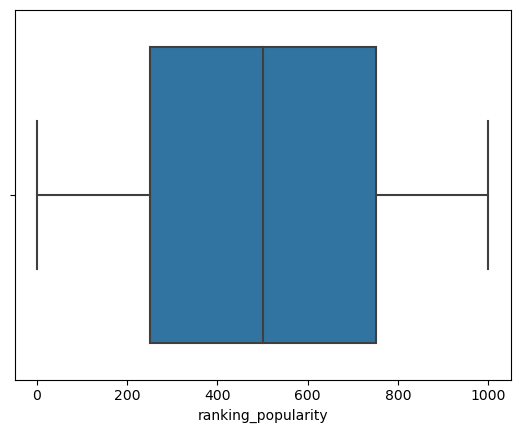

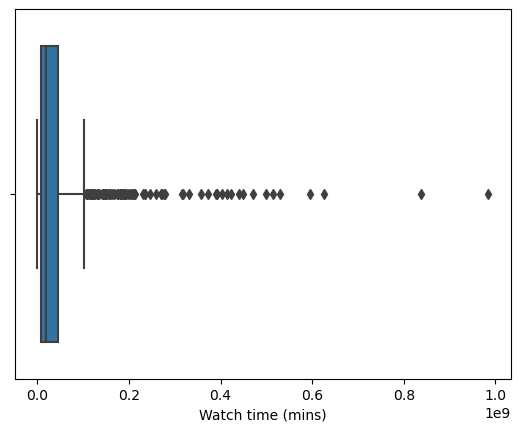

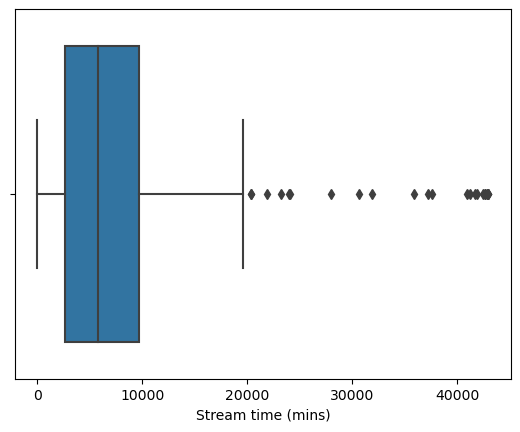

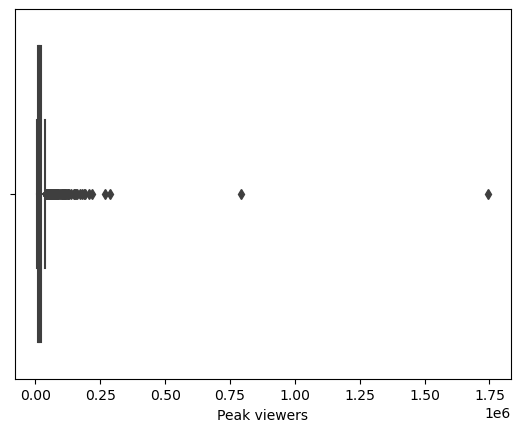

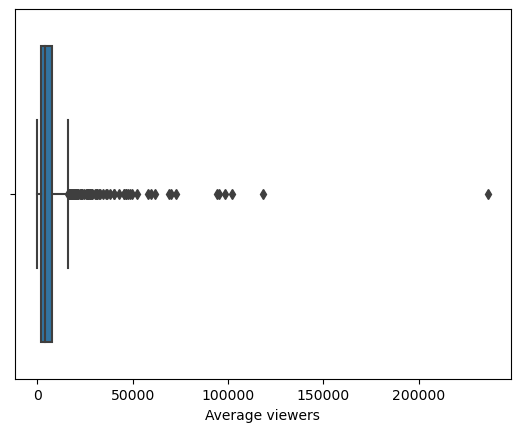

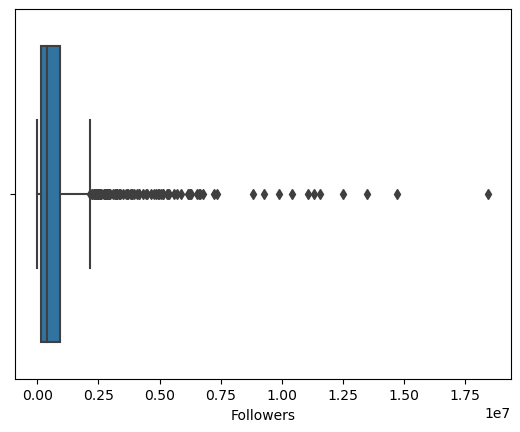

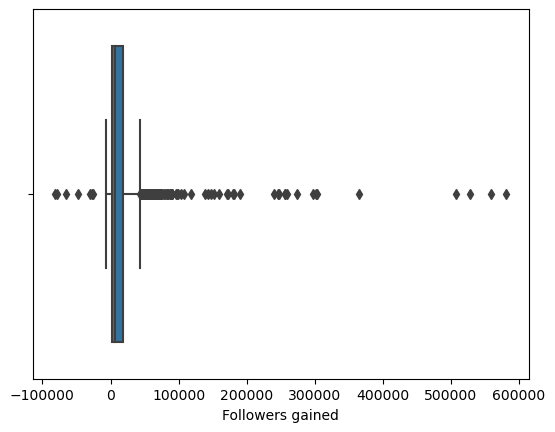

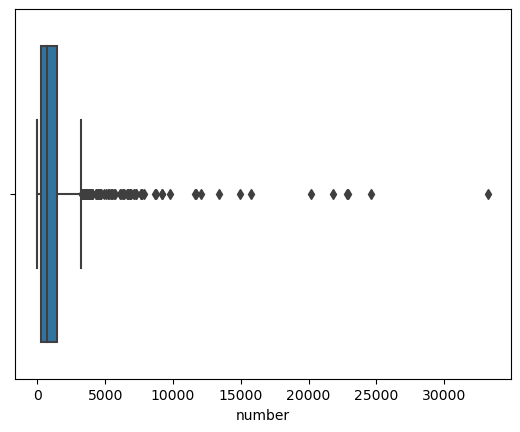

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

for i in range(len(numeric_df.columns)):
    sns.boxplot( numeric_df.iloc[:,i])
    plt.show()

In [20]:
#analisis por columnas de los datos
numeric_df.quantile([0,0.25,0.5,0.75,1])

,ranking_popularity,Watch time (mins),Stream time (mins),Peak viewers,Average viewers,Followers,Followers gained,number
0.00,1.00,4.416000e+04,30.00,7716.00,39.00,1064.0,-81344.00,0.0
0.25,250.75,6.958796e+06,2681.25,9792.75,2071.75,137453.5,2068.50,241.0
0.50,500.50,1.958630e+07,5835.00,13173.00,4021.50,390718.5,7202.50,676.5
0.75,750.25,4.570178e+07,9660.00,21324.00,7688.50,943964.0,18573.25,1424.5
1.00,1000.00,9.847947e+08,42945.00,1745462.00,236440.00,18460871.0,580828.00,33262.0


In [21]:
#filtrar todos los outliers
import numpy as np
import seaborn as sns

def outliers_iqr(df, column):
    iqr = np.percentile(df[column], 75) - np.percentile(df[column], 25)
    upper_limit = np.percentile(df[column], 75) + 1.5 * iqr
    lower_limit = np.percentile(df[column], 25) - 1.5 * iqr
    print("Upper Limit for", column, ":", upper_limit)
    print("Lower Limit for", column, ":", lower_limit)
    df = df[(df[column] > lower_limit) & (df[column] < upper_limit)]
    #sns.boxplot(df[column])

In [22]:
numeric_df_columns = numeric_df.columns.tolist()

for column in numeric_df_columns:
    outliers_iqr(numeric_df, column)

Upper Limit for ranking_popularity : 1499.5
Lower Limit for ranking_popularity : -498.5
Upper Limit for Watch time (mins) : 103816243.125
Lower Limit for Watch time (mins) : -51155671.875
Upper Limit for Stream time (mins) : 20128.125
Lower Limit for Stream time (mins) : -7786.875
Upper Limit for Peak viewers : 38620.875
Lower Limit for Peak viewers : -7504.125
Upper Limit for Average viewers : 16113.625
Lower Limit for Average viewers : -6353.375
Upper Limit for Followers : 2153729.75
Lower Limit for Followers : -1072312.25
Upper Limit for Followers gained : 43330.375
Lower Limit for Followers gained : -22688.625
Upper Limit for number : 3199.75
Lower Limit for number : -1534.25


In [23]:
numeric_df.describe()

,ranking_popularity,Watch time (mins),Stream time (mins),Peak viewers,Average viewers,Followers,Followers gained,number
count,1000.000000,1.000000e+03,1000.000000,1.000000e+03,1000.000000,1.000000e+03,1000.000000,1000.000000
mean,500.500000,4.344732e+07,6977.850000,2.501740e+04,7310.708000,8.968659e+05,20182.033000,1339.215000
std,288.819436,8.019676e+07,6253.326861,6.583903e+04,13045.931463,1.635525e+06,49827.073637,2508.040055
min,1.000000,4.416000e+04,30.000000,7.716000e+03,39.000000,1.064000e+03,-81344.000000,0.000000
25%,250.750000,6.958796e+06,2681.250000,9.792750e+03,2071.750000,1.374535e+05,2068.500000,241.000000
50%,500.500000,1.958630e+07,5835.000000,1.317300e+04,4021.500000,3.907185e+05,7202.500000,676.500000
75%,750.250000,4.570178e+07,9660.000000,2.132400e+04,7688.500000,9.439640e+05,18573.250000,1424.500000
max,1000.000000,9.847947e+08,42945.000000,1.745462e+06,236440.000000,1.846087e+07,580828.000000,33262.000000


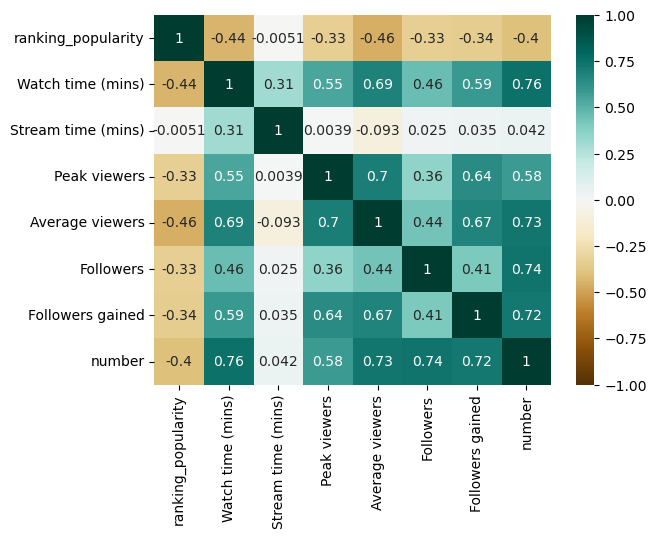

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
#checar colinealidad 
heatmap = sns.heatmap(numeric_df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
# despues de observar la coliniealidad no boramos valores ya que no se encuentra mucha colinealidad


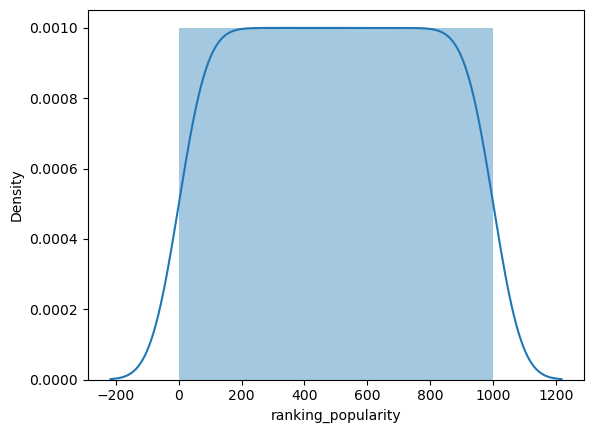

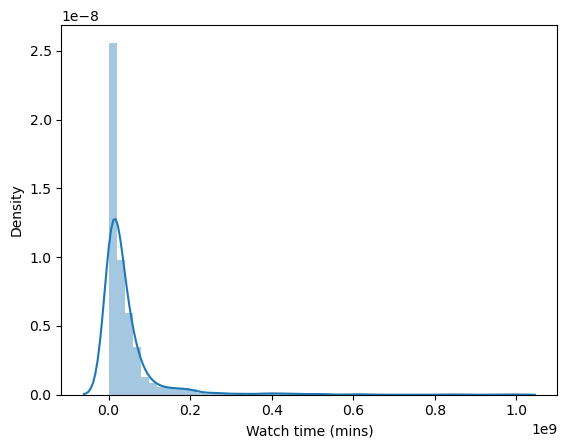

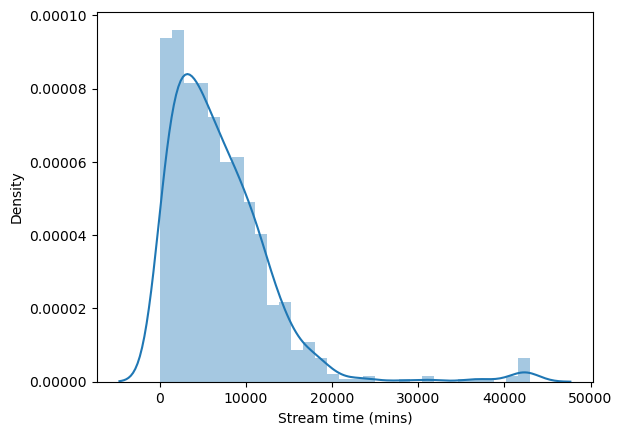

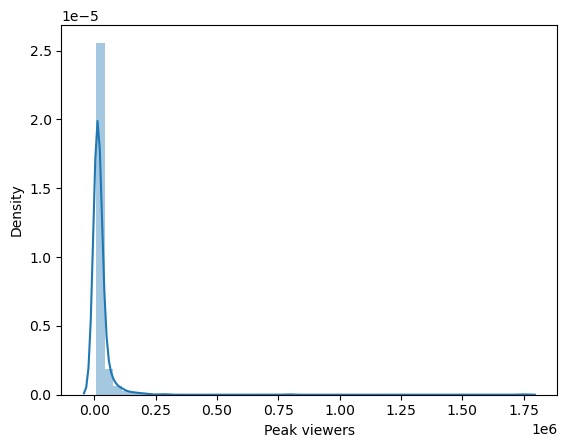

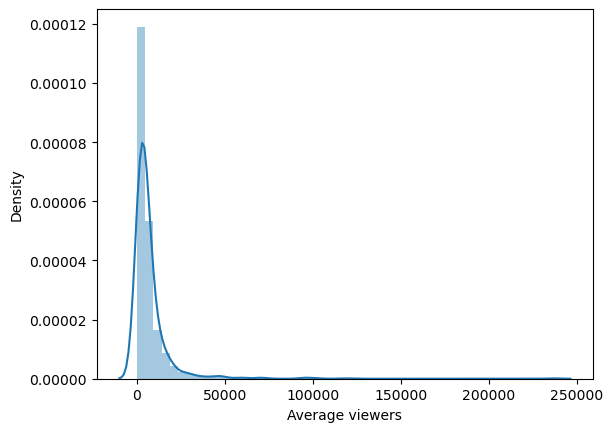

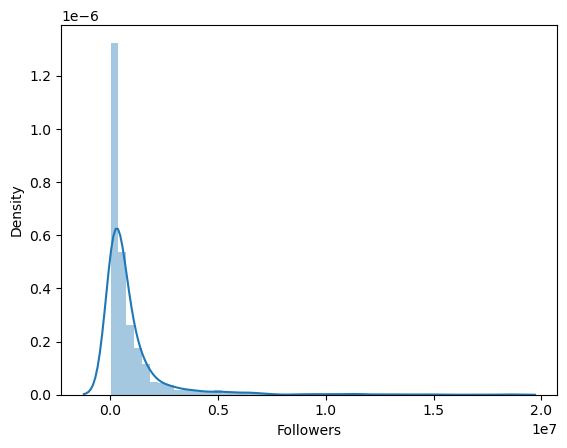

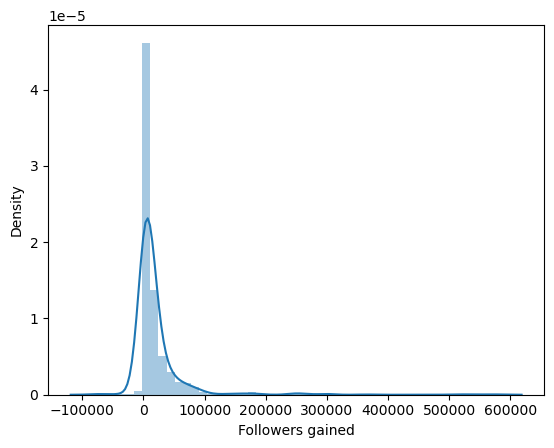

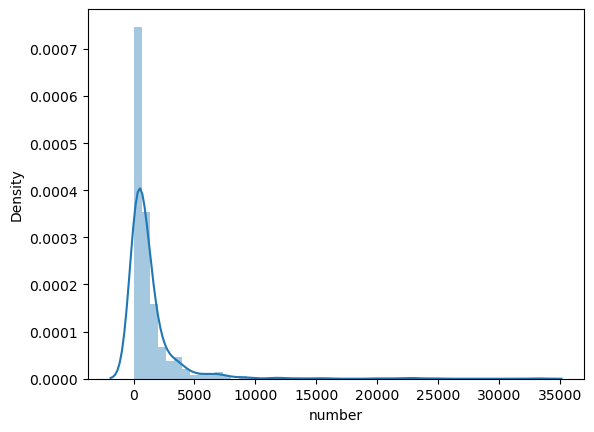

In [25]:
for i in range(len(numeric_df.columns)):
    sns.distplot( numeric_df.iloc[:,i])
    plt.show()

In [26]:
# normalizamos todos los valores numericos menos el ranking y "Followers gained"
import numpy as np
import pandas as pd
numeric_df_log = numeric_df.drop(['Followers gained','ranking_popularity','number','Watch time (mins)'], axis=1)
numeric_df_max_min = numeric_df

#Transformacion log normal
def transform_to_normal(dataframe, column_name):
    transformed_data = np.log(dataframe[column_name])
    transformed_data = transformed_data.dropna()
    
    return transformed_data

columns = list(numeric_df_log.columns)
df2 = pd.DataFrame()

for column in columns:
    transformed_data = transform_to_normal(numeric_df_log, column)
    df2[column] = transformed_data

print(df2)

# 0.5435932688413607


     Stream time (mins)  Peak viewers  Average viewers  Followers
0              8.571681     14.372530        11.681748  16.221740
1              7.656810     13.582358        12.373450  14.435478
2              8.640295     12.574656        11.144424  16.342880
3              8.709465     12.494228        11.495891  14.496383
4              8.522181     12.287851        11.535078  15.726843
..                  ...           ...              ...        ...
995            7.949797      8.957768         8.236950  13.344018
996            7.789455      8.957768         5.468060  10.571291
997            5.926926      8.954803         8.202482  11.985233
998            9.383873      8.954028         7.784889  12.460122
999            9.306559      8.951051         7.698936  13.195339

[1000 rows x 4 columns]


In [27]:
# trnasformacion de maximo y minimos 

def remove_left_bias(df, column):
    min_value = df[column].min()
    max_value = df[column].max()
    transformed_column = (df[column] - min_value) / (max_value - min_value)
    return pd.DataFrame({column: transformed_column})



In [28]:
numeric_df_max_min['Followers gained'] = remove_left_bias(numeric_df_max_min,'Followers gained')

In [29]:
numeric_df_max_min['Followers gained']

0      0.966669
1      1.000000
2      0.514709
3      0.536936
4      0.919394
         ...   
995    0.123737
996    0.123426
997    0.139151
998    0.128977
999    0.132346
Name: Followers gained, Length: 1000, dtype: float64

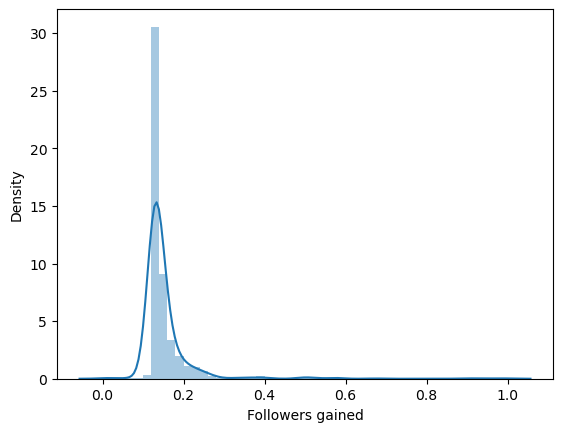

In [30]:

    sns.distplot( numeric_df_max_min['Followers gained'])
    plt.show()

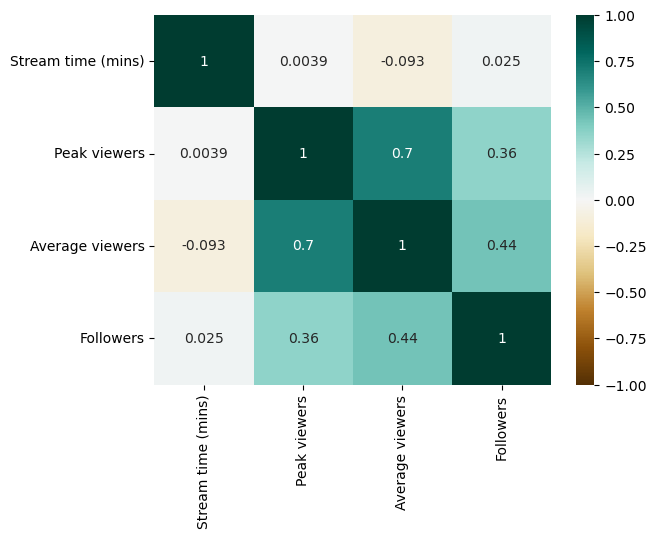

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
#checar colinealidad 
heatmap = sns.heatmap(numeric_df_log.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')

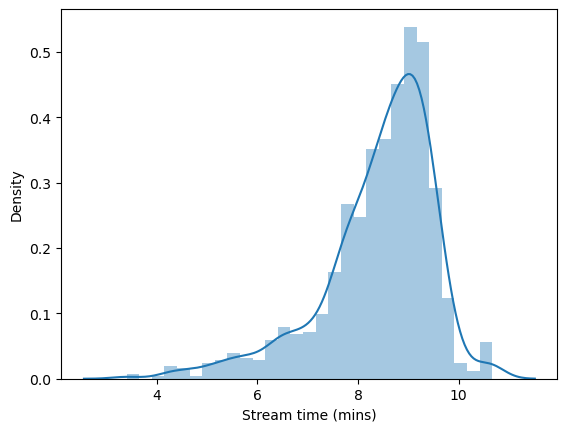

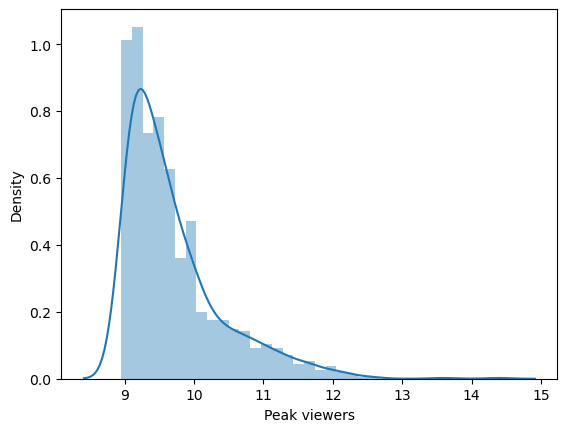

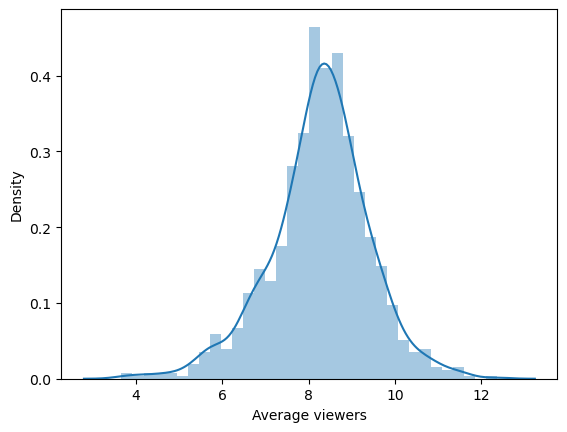

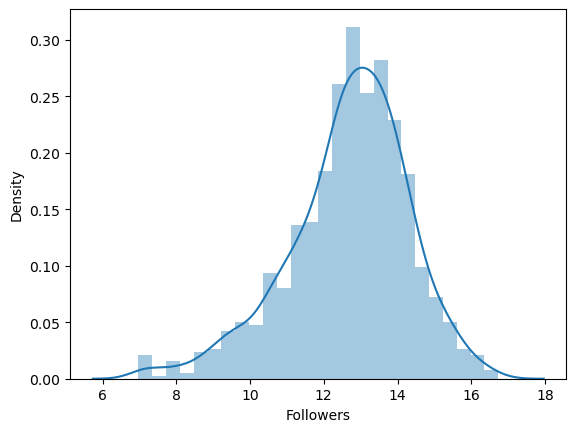

In [32]:
for i in range(len(df2.columns)):
    sns.distplot( df2.iloc[:,i])
    plt.show()

In [33]:
# Standarize the data
import pandas as pd
import numpy as np

def standardize_columns(df):
    for col in df.columns:
        mean = df[col].mean()
        std = df[col].std()
        df[col] = (df[col] - mean) / std
    return df

#df = pd.DataFrame({'col1': [1, 2, 3, 4, 5], 'col2': [6, 7, 8, 9, 10]})
df2 = standardize_columns(df2)
print(df2)


     Stream time (mins)  Peak viewers  Average viewers  Followers
0              0.144828      6.564159         2.973997   2.169574
1             -0.667952      5.452867         3.574587   1.077364
2              0.205785      4.035643         2.507450   2.243645
3              0.267236      3.922530         2.812622   1.114604
4              0.100851      3.632282         2.846647   1.866969
..                  ...           ...              ...        ...
995           -0.407659     -1.051120        -0.017046   0.409990
996           -0.550109     -1.051120        -2.421212  -1.285394
997           -2.204795     -1.055291        -0.046973  -0.420839
998            0.866386     -1.056381        -0.409560  -0.130468
999            0.797700     -1.060567        -0.484191   0.319080

[1000 rows x 4 columns]


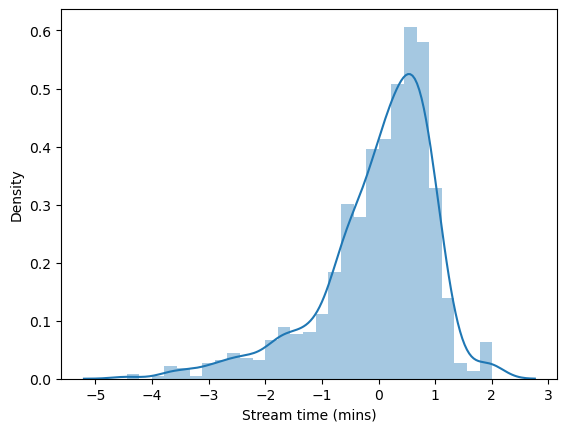

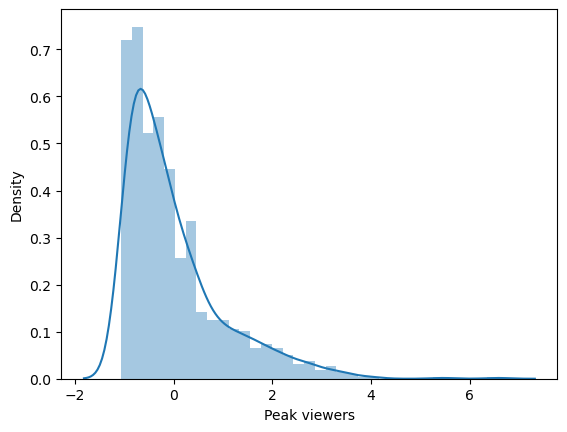

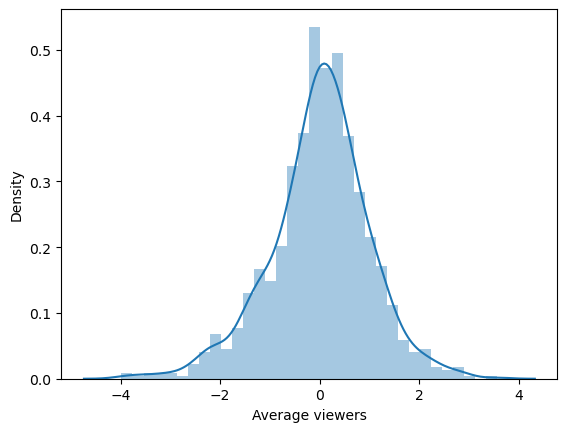

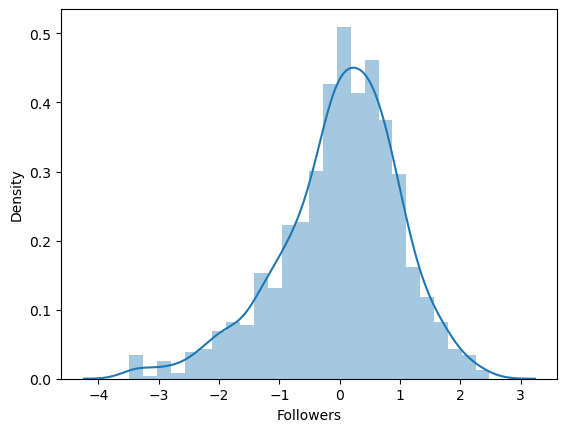

In [34]:
for i in range(len(df2.columns)):
    sns.distplot( df2.iloc[:,i])
    plt.show()

In [35]:
#Transform categoricla data
categorical_df = categorical_df.drop(['input_text','Channel'], axis=1)
categorical_df = pd.concat([numeric_df['ranking_popularity'],categorical_df], axis=1)
categorical_df 

,ranking_popularity,Partnered,Mature,Language,Esport_channel
0,1.0,True,False,Spanish,No
1,2.0,True,False,Spanish,No
2,3.0,True,False,Spanish,No
3,4.0,True,False,Portuguese,No
4,5.0,True,False,Spanish,No
...,...,...,...,...,...
995,996.0,False,False,English,No
996,997.0,True,False,French,No
997,998.0,False,False,Russian,No
998,999.0,True,False,Korean,No


In [36]:
categorical_df

,ranking_popularity,Partnered,Mature,Language,Esport_channel
0,1.0,True,False,Spanish,No
1,2.0,True,False,Spanish,No
2,3.0,True,False,Spanish,No
3,4.0,True,False,Portuguese,No
4,5.0,True,False,Spanish,No
...,...,...,...,...,...
995,996.0,False,False,English,No
996,997.0,True,False,French,No
997,998.0,False,False,Russian,No
998,999.0,True,False,Korean,No


In [37]:
from sklearn import preprocessing

X_cat = categorical_df.apply(preprocessing.LabelEncoder().fit_transform)
X_cat 

,ranking_popularity,Partnered,Mature,Language,Esport_channel
0,0,1,0,14,0
1,1,1,0,14,0
2,2,1,0,14,0
3,3,1,0,12,0
4,4,1,0,14,0
...,...,...,...,...,...
995,995,0,0,4,0
996,996,1,0,5,0
997,997,0,0,13,0
998,998,1,0,10,0


In [38]:
# numeric_df_columns = numeric_df.columns.tolist()

from sklearn.preprocessing import LabelEncoder

# Define categorical data
categories = categorical_df['Language'].tolist()

# Create the encoder object
encoder = LabelEncoder()

# Fit the encoder to the categorical data
encoder.fit(categories)

# Get the unique categorical values and their assigned numerical values
catalog = dict(zip(encoder.classes_, range(len(encoder.classes_))))
print("Catalog:", catalog)
df_catalog = pd.DataFrame(catalog, index=[0])

df_catalog.to_csv('catalog_Language.csv')


Catalog: {'Arabic': 0, 'Chinese': 1, 'Czech': 2, 'Dutch': 3, 'English': 4, 'French': 5, 'German': 6, 'Greek': 7, 'Italian': 8, 'Japanese': 9, 'Korean': 10, 'Polish': 11, 'Portuguese': 12, 'Russian': 13, 'Spanish': 14, 'Thai': 15, 'Turkish': 16, 'Ukrainian': 17}


0

In [39]:
df2_follow = pd.DataFrame( numeric_df_max_min['Followers gained'])
df2_follow

,Followers gained
0,0.966669
1,1.000000
2,0.514709
3,0.536936
4,0.919394
...,...
995,0.123737
996,0.123426
997,0.139151
998,0.128977


In [40]:
X = np.concatenate((df2,df2_follow,X_cat),axis =1)
X

array([[ 0.14482786,  6.56415851,  2.97399708, ...,  0.        ,
        14.        ,  0.        ],
       [-0.66795153,  5.45286745,  3.57458662, ...,  0.        ,
        14.        ,  0.        ],
       [ 0.20578512,  4.03564258,  2.50745016, ...,  0.        ,
        14.        ,  0.        ],
       ...,
       [-2.20479516, -1.05529075, -0.04697318, ...,  0.        ,
        13.        ,  0.        ],
       [ 0.86638613, -1.05638069, -0.40956019, ...,  0.        ,
        10.        ,  0.        ],
       [ 0.79769955, -1.06056666, -0.48419138, ...,  1.        ,
         4.        ,  0.        ]])

In [41]:
X_graf = pd.concat((df2,df2_follow,X_cat),axis =1)
X_graf

,Stream time (mins),Peak viewers,Average viewers,Followers,Followers gained,ranking_popularity,Partnered,Mature,Language,Esport_channel
0,0.144828,6.564159,2.973997,2.169574,0.966669,0,1,0,14,0
1,-0.667952,5.452867,3.574587,1.077364,1.000000,1,1,0,14,0
2,0.205785,4.035643,2.507450,2.243645,0.514709,2,1,0,14,0
3,0.267236,3.922530,2.812622,1.114604,0.536936,3,1,0,12,0
4,0.100851,3.632282,2.846647,1.866969,0.919394,4,1,0,14,0
...,...,...,...,...,...,...,...,...,...,...
995,-0.407659,-1.051120,-0.017046,0.409990,0.123737,995,0,0,4,0
996,-0.550109,-1.051120,-2.421212,-1.285394,0.123426,996,1,0,5,0
997,-2.204795,-1.055291,-0.046973,-0.420839,0.139151,997,0,0,13,0
998,0.866386,-1.056381,-0.409560,-0.130468,0.128977,998,1,0,10,0


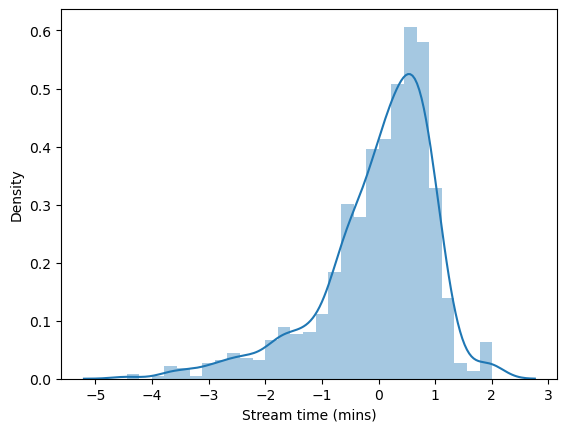

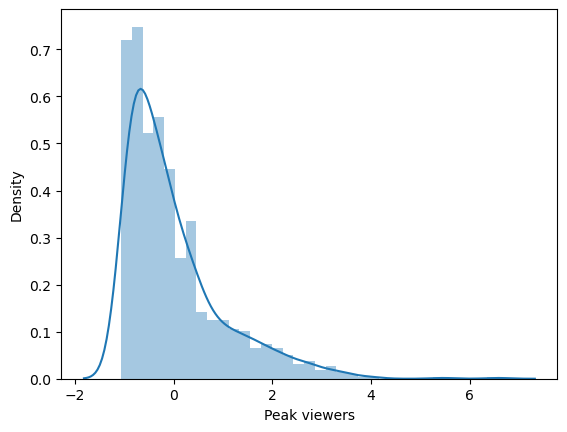

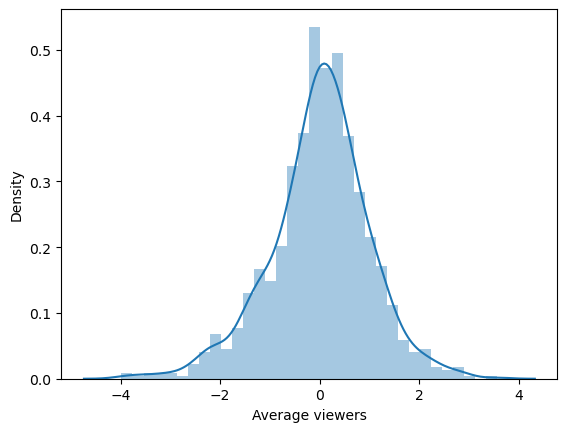

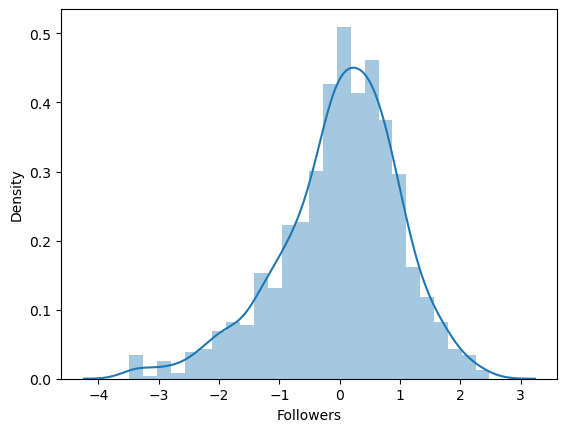

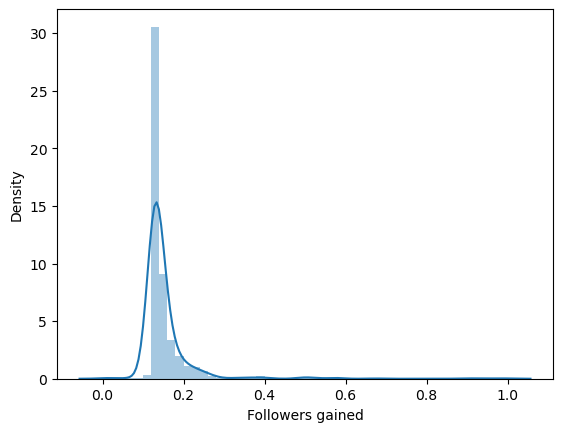

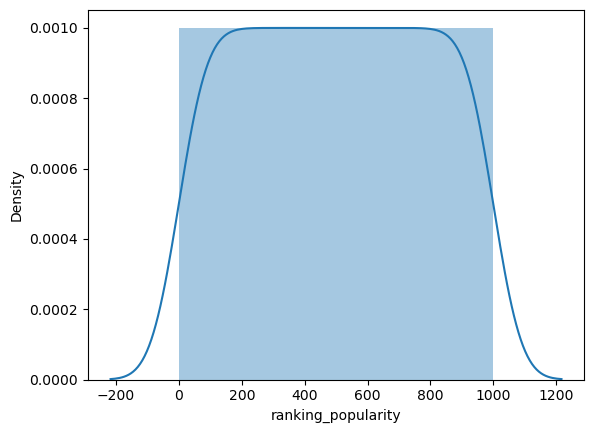

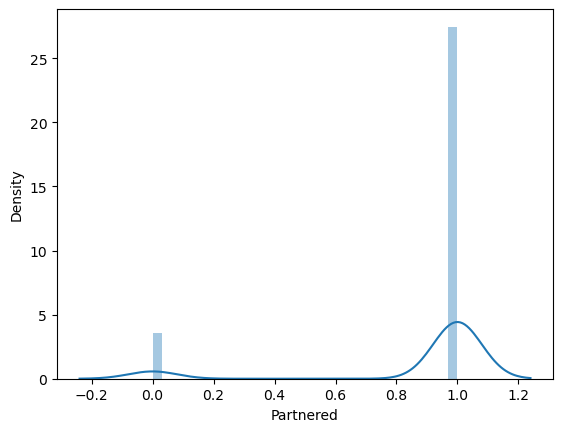

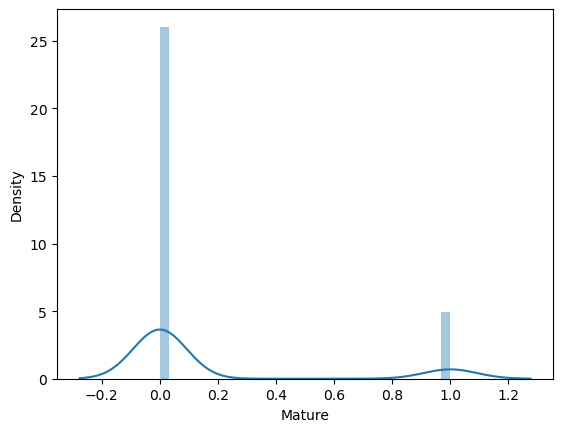

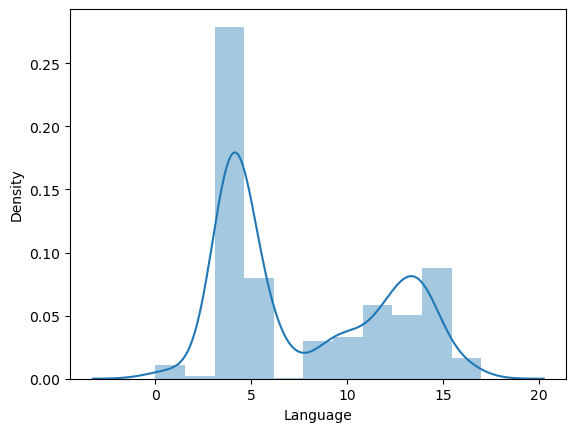

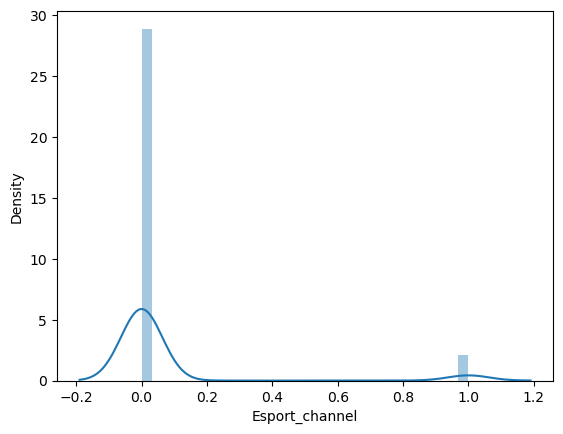

In [42]:
for i in range(len(X_graf.columns)):
    sns.distplot( X_graf.iloc[:,i])
    plt.show()

In [43]:
#seleccionamos nuestra variaable independiente
y = df['number']
y

0      22833.0
1      22941.0
2      14954.0
3      13417.0
4      20148.0
        ...   
995      842.0
996       30.0
997      177.0
998        0.0
999      269.0
Name: number, Length: 1000, dtype: float64

In [44]:
# Entrenamos nuestro modelo
y = df['number']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=5)

In [45]:
#Haciendo el modelo lineal, con una regresión
lm=linear_model.LinearRegression()

In [46]:
#Aquí ya ajustamos la maquinaria rpevia
model=lm.fit(X_train,y_train)

In [47]:
predictions=lm.predict(X_train)
predictions[:10]

array([ 276.46005465, 2371.32202681, -323.79467565,  726.46956328,
       1008.31901684,  109.07450139, 1381.85897625,  660.98679658,
       2129.32061362, 1155.09759218])

In [48]:
r2_score(y_train,predictions)  

0.671421466659374

In [49]:
coefficient = model.coef_[0]
intercept = model.intercept_

# create the equation of the line
equation = "y = {:.2f} + {:.2f}x".format(intercept, coefficient)
print(equation)


y = -2166.37 + 23.10x


In [52]:
df_ecuacion =pd.concat((df2,df2_follow,X_cat),axis =1)
df_ecuacion



,Stream time (mins),Peak viewers,Average viewers,Followers,Followers gained,ranking_popularity,Partnered,Mature,Language,Esport_channel
0,0.144828,6.564159,2.973997,2.169574,0.966669,0,1,0,14,0
1,-0.667952,5.452867,3.574587,1.077364,1.000000,1,1,0,14,0
2,0.205785,4.035643,2.507450,2.243645,0.514709,2,1,0,14,0
3,0.267236,3.922530,2.812622,1.114604,0.536936,3,1,0,12,0
4,0.100851,3.632282,2.846647,1.866969,0.919394,4,1,0,14,0
...,...,...,...,...,...,...,...,...,...,...
995,-0.407659,-1.051120,-0.017046,0.409990,0.123737,995,0,0,4,0
996,-0.550109,-1.051120,-2.421212,-1.285394,0.123426,996,1,0,5,0
997,-2.204795,-1.055291,-0.046973,-0.420839,0.139151,997,0,0,13,0
998,0.866386,-1.056381,-0.409560,-0.130468,0.128977,998,1,0,10,0


In [53]:
column_names = df_ecuacion.columns.tolist()

for i in range(len(model.coef_)):
    coefficient = round(model.coef_[i], 4)
    intercept = round(model.intercept_, 4)
    equation = "y = {:.4f} + {:.4f}x_{}".format(intercept, coefficient, column_names[i])
    print(equation)

y = -2166.3716 + 23.0996x_Stream time (mins)
y = -2166.3716 + 1180.0189x_Peak viewers
y = -2166.3716 + 243.2683x_Average viewers
y = -2166.3716 + 582.2864x_Followers
y = -2166.3716 + 16679.5689x_Followers gained
y = -2166.3716 + 2.7027x_ranking_popularity
y = -2166.3716 + -32.4783x_Partnered
y = -2166.3716 + 144.3148x_Mature
y = -2166.3716 + -50.3301x_Language
y = -2166.3716 + -184.1848x_Esport_channel


In [ ]:

# en el dashboard hay que incluir analisis del contenido maduro
# comparar la cantidad de canales de esports con los stremears mas populares
# comparar los lenguajes y las mejores en ganancias
# 

In [57]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Assume that y_true and y_pred are the actual values and predicted values respectively
# y_true = np.array([1, 2, 3, 4, 5])
# y_pred = np.array([1.2, 2.2, 2.8, 4.1, 5.1])

# Calculate MAE
mae = mean_absolute_error(y_train, predictions)

# Calculate MSE
mse = mean_squared_error(y_train, predictions)

# Print the results
print("MAE:", mae)
print("MSE:", mse)

MAE: 850.8956958877176
MSE: 2450402.1519022663


In [54]:
y_train

688     185.0
178    5040.0
498      22.0
989     442.0
648     590.0
        ...  
400    1565.0
118     258.0
701     863.0
206    1178.0
867      45.0
Name: number, Length: 750, dtype: float64

In [56]:
predictions.shape

(750,)

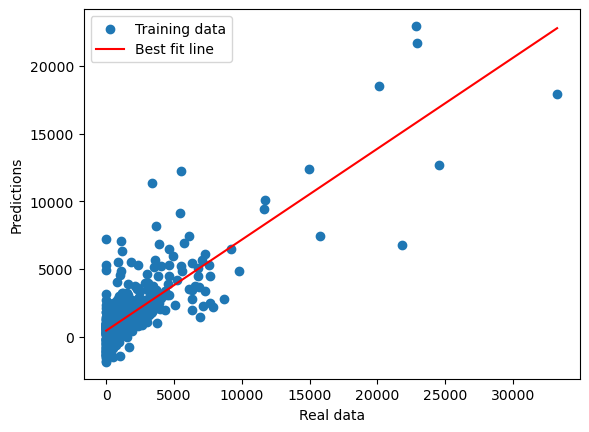

In [65]:
plt.scatter(y_train, predictions, label='Training data')
plt.plot(np.unique(y_train), np.poly1d(np.polyfit(y_train, predictions, 1))(np.unique(y_train)), color='red', label='Best fit line')
plt.xlabel('Real data')
plt.ylabel('Predictions')
plt.legend()
plt.show()

In [61]:
X_train.shape

(750, 10)

In [63]:
y_train.shape

(750,)